# Target Analysis

I do some target analysis of the columns `rejected` and `patient_pay`. I also check if `patient_pay` is normally distributed, and conclude that it is not.

In [ ]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('pharmacy_tx.csv')

There are almost 14 million rows.

## `rejected` and `patient_pay` Analysis

I analyze the `rejected` and `patient_pay` columns.

In [8]:
len(df.loc[df.rejected==True])

1086860

In [9]:
len(df.loc[df.rejected==False])

12823384

In [10]:
print('Percent rejected is', 1086860/13910244) 
print('Percent accepted is', 12823384/13910244)

Percent rejected is 0.0781337839940119
Percent accepted is 0.9218662160059881


<AxesSubplot:>

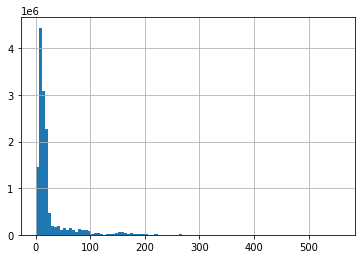

In [11]:
df.patient_pay.hist(bins=100)

In [12]:
df = df.assign(log_patient_pay = np.log(df.patient_pay+1))

<AxesSubplot:>

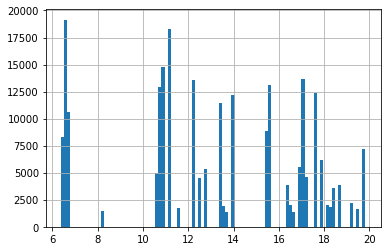

In [7]:
df.loc[df.drug == 'branded tanoclolol'].patient_pay.hist(bins=100)

In [14]:
len(df.loc[df.patient_pay == 0])

1086860

In [17]:
df.loc[df.patient_pay == 0]['rejected'].sum()

1086860

## Note

- `patient_pay==0` is the same as `rejected==True`

In [17]:
df.groupby('bin').corr()

rejected  patient_pay
bin                                      
96934  rejected     1.000000    -0.178655
       patient_pay -0.178655     1.000000
160389 rejected     1.000000    -0.208241
       patient_pay -0.208241     1.000000
322463 rejected     1.000000    -0.181384
       patient_pay -0.181384     1.000000
539437 rejected     1.000000    -0.176935
       patient_pay -0.176935     1.000000
571569 rejected     1.000000    -0.156864
       patient_pay -0.156864     1.000000
664344 rejected     1.000000    -0.186525
       patient_pay -0.186525     1.000000
691847 rejected     1.000000    -0.175757
       patient_pay -0.175757     1.000000
718350 rejected     1.000000    -0.166722
       patient_pay -0.166722     1.000000
725700 rejected     1.000000    -0.168727
       patient_pay -0.168727     1.000000
756120 rejected     1.000000    -0.206436
       patient_pay -0.206436     1.000000
757349 rejected     1.000000    -0.187133
       patient_pay -0.187133     1.000000
956971 rejected     1.000000    -0.183352
       patient_pay -0.183352     1.000000

In [54]:
df2 = df.drug.str.split(' ', n=2, expand=True).rename({0:'branded', 1:'drug_type'}, 
                         axis=1).replace({'branded':True, 'generic':False}, 
                                         inplace=True)
#for i in range(len(df.drug)):
    

In [55]:
df2

## Target Analysis

Here, we are going to check the normality of `patient_pay`.

In [46]:
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt

In [38]:
logvalues = np.log(df.loc[df.patient_pay != 0].patient_pay + 1)

In [39]:
test = shapiro(logvalues)

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [40]:
test.statistic

0.8429030179977417

In [41]:
test

ShapiroResult(statistic=0.8429030179977417, pvalue=0.0)

((array([-5.31254158, -5.14861904, -5.06040071, ...,  5.06040071,
          5.14861904,  5.31254158]),
  array([1.48160454, 1.48160454, 1.48160454, ..., 6.32589899, 6.32602424,
         6.32602424])),
 (0.7339703457983772, 2.866535358265082, 0.9374205454289386))

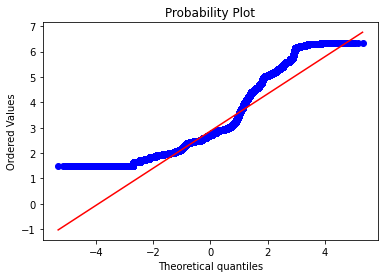

In [47]:
probplot(logvalues, dist='norm', plot=plt)